In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from community import community_louvain
from citations import citations_dict

In [2]:
q1 = pd.read_csv('Queries/Query 1.csv')
q2 = pd.read_csv('Queries/Query 2.csv')
q3 = pd.read_csv('Queries/Query 3.csv')
q4 = pd.read_csv('Queries/Query 4.csv')
q5 = pd.read_csv('Queries/Query 5.csv')
q6 = pd.read_csv('Queries/Query 6.csv')
q7 = pd.read_csv('Queries/Query 7.csv')
q8 = pd.read_csv('Queries/Query 8.csv')
q2 = q2.filter(list(q1))
q8 = q8.filter(list(q1))

data = pd.concat([q1, q2, q3, q4, q5, q6, q7, q8])

data.drop_duplicates(subset = ['Authors', 'Author(s) ID', 'Title', 'Year', 'Cited by'], keep = 'first', inplace = True)

data = data.dropna(subset = ['DOI', 'Cited by'])

data = data.reset_index()
data = data.filter(['Authors', 'Author(s) ID', 'Title', 'Year', 'Cited by', 'DOI', 'Author Keywords', 'Index Keywords', 'Conference name'])

data['Auth_ID'] = None
data['Auth_Keywords'] = None
data['Ind_Keywords'] = None

for index in range(len(data)):

    try:
        data.at[index, 'Auth_ID'] = data.iloc[index, 1].split(';')[:-1]
    except:
        pass
    try:
        data.at[index, 'Auth_Keywords'] = data.iloc[index, 6].split('; ')
    except:
        pass
    try:
        data.at[index, 'Ind_Keywords'] = data.iloc[index, 7].split('; ')
    except:
        pass

data = data.filter(['Authors', 'Auth_ID', 'Title', 'Year', 'Cited by', 'DOI', 'Auth_Keywords', 'Ind_Keywords', 'Conference name'])
print(len(data), list(data))

516 ['Authors', 'Auth_ID', 'Title', 'Year', 'Cited by', 'DOI', 'Auth_Keywords', 'Ind_Keywords', 'Conference name']


In [3]:
'''
Most cited articles globally according to citation count 
'''

citations = data.sort_values(by = ['Cited by'], ascending = False).head(10)

for index in range(len(citations)):
    print('[{}] - {}, {}'.format(citations.iloc[index, 4], citations.iloc[index, 2], citations.iloc[index, 0]))

[208.0] - Advanced Persistent threats and how to monitor and deter them, Tankard C.
[204.0] - Cloud-Assisted IoT-Based SCADA Systems Security: A Review of the State of the Art and Future Challenges, Sajid A., Abbas H., Saleem K.
[197.0] - Advanced social engineering attacks, Krombholz K., Hobel H., Huber M., Weippl E.
[139.0] - FlipIt: The game of "stealthy takeover", Van Dijk M., Juels A., Oprea A., Rivest R.L.
[139.0] - A study on advanced persistent threats, Chen P., Desmet L., Huygens C.
[113.0] - Targeted cyberattacks: A superset of advanced persistent threats, Sood A.K., Enbody R.J.
[112.0] - The big four - What we did wrong in advanced persistent threat detection?, Virvilis N., Gritzalis D.
[108.0] - Combating advanced persistent threats: From network event correlation to incident detection, Friedberg I., Skopik F., Settanni G., Fiedler R.
[94.0] - A Hierarchical Security Framework for Defending Against Sophisticated Attacks on Wireless Sensor Networks in Smart Cities, Wu J., Ot

In [4]:
'''
Top publication forums globally
'''

conferences = {}

for index in range(len(data)):
    conference = data.iloc[index, 8]
    if conference in conferences.keys():
        value = conferences[conference]
        conferences[conference] = value + 1
    else:
        conferences[conference] = 1

for key, value in conferences.items():
    if str(key) != 'nan' and value > 1:
        print('{} - {}'.format(value, key))
        
data = data.drop(['Conference name'], axis = 1)

3 - 10th International Conference on Decision and Game Theory for Security, GameSec 2019
3 - 9th International Conference on Decision and Game Theory for Security, GameSec 2018
2 - 4th Information Systems International Conference 2017, ISICO 2017
3 - 7th International Conference on Decision and Game Theory for Security, GameSec 2016
2 - 12th IEEE International Conference on Dependable, Autonomic and Secure Computing, DASC 2014
2 - 3rd International Conference on Decision and Game Theory for Security, GameSec 2012
2 - 2020 International Conference on Cyber Security and Protection of Digital Services, Cyber Security 2020
2 - 2020 IEEE/IFIP Network Operations and Management Symposium, NOMS 2020
2 - 26th ACM SIGSAC Conference on Computer and Communications Security, CCS 2019
2 - 2019 IEEE Military Communications Conference, MILCOM 2019
2 - 2019 IEEE International Conference on Communications, ICC 2019
2 - 2018 IEEE Conference on Application, Information and Network Security, AINS 2018
2 - 

In [5]:
'''
Filtering citation DOI's already existing in the database, obtaining cited authors
'''

data_copy = data.copy()
existing_DOIs = data['DOI'].tolist()
data['Citations'] = None
data['Cit_Updated'] = None

for index in range(len(data)):
    doi = data.iloc[index, 5]
    try:
        data.at[index, 'Citations'] = citations_dict[doi]
    except:
        pass
    
for index in range(len(data)):
    citations = data.iloc[index, 8]
    fin_citations = []
    try:
        for citation in citations:
            if citation in existing_DOIs:
                fin_citations.append(citation)
        if len(fin_citations) > 0:
            data.at[index, 'Cit_Updated'] = fin_citations
    except:
        pass
            
data = data.dropna(subset = ['Cit_Updated'])
data = data.reset_index()
data = data.filter(['Authors', 'Auth_ID', 'Title', 'Cited by', 'DOI', 'Auth_Keywords', 'Ind_Keywords', 'Cit_Updated'])

data['Cit_Authors'] = None

for index in range(len(data)):
    citations = data.iloc[index, 7]
    cit_authors = []
    cit_authors_final = []
    
    for citation in citations:
        row = data_copy.loc[data_copy['DOI'] == citation]

        for author in row.iloc[0, 1]:
            cit_authors.append(author)
            
    [cit_authors_final.append(x) for x in cit_authors if x not in cit_authors_final]
    data.at[index, 'Cit_Authors'] = cit_authors_final

data

,Authors,Auth_ID,Title,Cited by,DOI,Auth_Keywords,Ind_Keywords,Cit_Updated,Cit_Authors
0,"Tian W., Ji X.-P., Liu W., Zhai J., Liu G., Da...","[57210136318, 24537536000, 55264296800, 357718...",Honeypot game-theoretical model for defending ...,6.0,10.4218/etrij.2019-0152,"[advanced persistent threat, cyber security, g...","[Cyber Physical System, Embedded systems, Netw...",[10.1109/ACCESS.2020.2984795],"[57210136318, 24537536000, 55264296800, 894508..."
1,"Ahmad A., Webb J., Desouza K.C., Boorman J.","[16318491100, 57220887026, 6701517492, 5720985...",Strategically-motivated advanced persistent th...,22.0,10.1016/j.cose.2019.07.001,"[Advanced persistent threat, APT, Cybersecurit...","[Decision making, Security of data, Advanced p...","[10.1002/ett.3884, 10.1109/CyberSecurity49315....","[57211431003, 57211429127, 57212620226, 572126..."
2,"Lv K., Chen Y., Hu C.","[57195491777, 57195493638, 7404569966]",Dynamic defense strategy against advanced pers...,8.0,10.1016/j.inffus.2019.01.001,"[Advanced persistent threat, Dynamic defense s...","[Data fusion, Game theory, Heterogeneous netwo...","[10.1002/ett.3884, 10.1002/cpe.6001, 10.1109/A...","[57211431003, 57211429127, 57212620226, 572126..."
3,"Yang L.-X., Li P., Zhang Y., Yang X., Xiang Y....","[57218305777, 57189377027, 55508709300, 353384...",Effective Repair Strategy Against Advanced Per...,31.0,10.1109/TIFS.2018.2885251,"[advanced persistent threat, APT repair proble...","[Computation theory, Game theory, advanced per...","[10.1016/j.cose.2019.101660, 10.1109/ACCESS.20...","[57196404575, 24767254400, 57189377027, 353384..."
4,"Li Y., Dai W., Bai J., Gan X., Wang J., Wang X.","[57189050702, 57202514296, 57202510645, 359000...",An Intelligence-Driven Security-Aware Defense ...,19.0,10.1109/TIFS.2018.2847671,"[APT attacks, distributed auction algorithm, p...","[Combinatorial optimization, Computer games, C...","[10.1007/s00521-021-05952-5, 10.1002/ett.3884,...","[57219504463, 57219503931, 57211431003, 572114..."
...,...,...,...,...,...,...,...,...,...
234,"De Vries J., Hoogstraaten H., Van Den Berg J.,...","[57197072929, 55811812600, 7201551194, 5604708...",Systems for detecting advanced persistent thre...,31.0,10.1109/CyberSecurity.2012.14,"[advanced persistent threats, cyber security, ...","[Anomaly detection, Complex networks, Computer...","[10.1016/j.cose.2019.03.015, 10.1109/TIFS.2018...","[24168909500, 14028408400, 36675926500, 572183..."
235,"Giura P., Wang W.","[35770854500, 55321518700]",A context-based detection framework for advanc...,58.0,10.1109/CyberSecurity.2012.16,"[APT, Security]","[Context-based, Cyber threats, Detection frame...","[10.3390/app10113874, 10.1016/j.cose.2020.1017...","[57195303529, 56264675400, 55602888600, 571977..."
236,"Li F., Lai A., Ddl D.","[36844274600, 54895275100, 54895207000]",Evidence of advanced persistent threat: A case...,61.0,10.1109/MALWARE.2011.6112333,None,"[Anti-virus programs, Command and control, Cyb...","[10.1109/ETFA46521.2020.9212128, 10.3390/s2003...","[57219503421, 57193056297, 57189065985, 571697..."
237,Winder D.,[7004402474],Persistent and evasive attacks uncovered,3.0,10.1016/S1754-4548(11)70069-9,None,"[Critical asset, Industry experts, Malwares, P...","[10.1109/ICC.2016.7511197, 10.1007/978-3-642-4...","[57190430040, 23391663200, 7103278515, 5644978..."


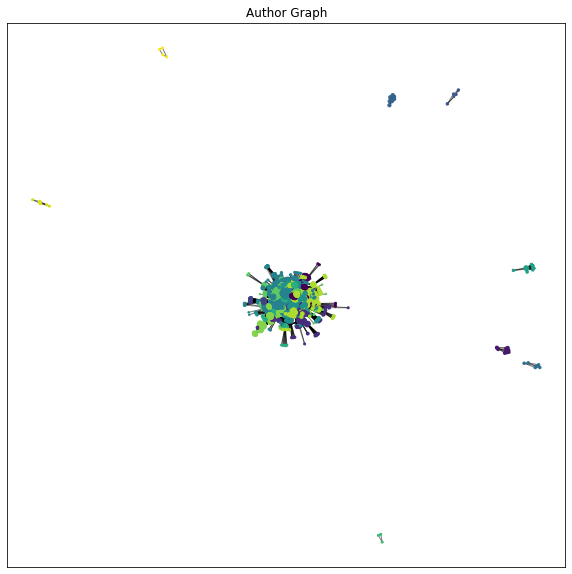

In [6]:
'''
Creating the author graph
'''

Author_Graph = nx.Graph()

for index in range(len(data)):
    authors = data.iloc[index, 1]
    for author in authors:
        if Author_Graph.has_node(author) == True:
            pass
        else:   
            Author_Graph.add_node(author)
            
for index in range(len(data)):
    authors = data.iloc[index, 1]
    cit_authors = data.iloc[index, 8]

    for author in authors:
        for cit_author in cit_authors:
            if author != cit_author:
                if Author_Graph.has_edge(author, cit_author) == True:
                    pass
                else:
                    Author_Graph.add_edge(author, cit_author)
                    
# Remove isolated nodes from graph

Author_Graph.remove_nodes_from(list(nx.isolates(Author_Graph)))
                    
partition = community_louvain.best_partition(Author_Graph)
number_partitions = max(partition.values()) + 1

node_degree = dict(Author_Graph.degree)

plt.figure(figsize = (10, 10))

pos = nx.spring_layout(Author_Graph)
cmap = cm.get_cmap('viridis', number_partitions)
nx.draw_networkx_nodes(Author_Graph, pos, partition.keys(), node_size = [x * 2 for x in node_degree.values()], cmap = cmap, node_color = list(partition.values()))
nx.draw_networkx_edges(Author_Graph, pos, alpha = 0.5)
plt.title('Author Graph')
plt.show()

In [7]:
print('number of partitions - {}'.format(number_partitions))

number of partitions - 17


In [8]:
author_df = pd.DataFrame()
author_df['Author ID'] = None
author_df['Partition'] = None
author_df['Keywords'] = None

index = 0
for key, value in partition.items():
    author_df.at[index, 'Author ID'] = key
    author_df.at[index, 'Partition'] = value
    index += 1
    
for index in range(len(author_df)):
    author = author_df.iloc[index, 0]
    selection = [author]
    keywords = []
    keywords_final = []
    
    rows = data[data.Auth_ID.apply(lambda x: any(item for item in selection if item in x))]
    
    try:
        for j in range(len(rows)):
            for keyword in rows.iloc[j, 6]:
                keywords.append(keyword)
            
        [keywords_final.append(x) for x in keywords if x not in keywords_final]
        if len(keywords_final) > 0:
            author_df.at[index, 'Keywords'] = keywords_final
    except:
        pass
    
author_df = author_df.dropna(subset = ['Keywords'])
author_df

,Author ID,Partition,Keywords
0,57210136318,12,"[Cyber Physical System, Embedded systems, Netw..."
1,24537536000,12,"[Cyber Physical System, Embedded systems, Netw..."
2,55264296800,12,"[Cyber Physical System, Embedded systems, Netw..."
3,35771838800,12,"[Cyber Physical System, Embedded systems, Netw..."
4,8945082800,12,"[Cyber Physical System, Embedded systems, Netw..."
...,...,...,...
638,55321518700,7,"[Context-based, Cyber threats, Detection frame..."
639,36844274600,7,"[Anti-virus programs, Command and control, Cyb..."
640,54895275100,7,"[Anti-virus programs, Command and control, Cyb..."
641,54895207000,7,"[Anti-virus programs, Command and control, Cyb..."


In [9]:
for index in range(number_partitions):
    df = author_df[author_df['Partition'] == index]
    author_dict = {}
    for i in range(len(df)):
        kwds = df.iloc[i, 2]
        try:
            for kwd in kwds:
                if kwd in author_dict.keys():
                    val = author_dict[kwd]
                    author_dict[kwd] = val + 1
                else:
                    author_dict[kwd] = 1
        except:
            pass
    max_key = max(author_dict, key = author_dict.get)
    print('Community {} - Keyword - {}, Count - {}\n'.format(index + 1, max_key, author_dict[max_key]))

Community 1 - Keyword - Malware, Count - 7

Community 2 - Keyword - Artificial intelligence, Count - 4

Community 3 - Keyword - Network security, Count - 68

Community 4 - Keyword - Complex networks, Count - 10

Community 5 - Keyword - Cloud computing, Count - 3

Community 6 - Keyword - Computer crime, Count - 6

Community 7 - Keyword - Application programming interfaces (API), Count - 3

Community 8 - Keyword - Network security, Count - 47

Community 9 - Keyword - Computer crime, Count - 51

Community 10 - Keyword - Artificial intelligence, Count - 7

Community 11 - Keyword - Network security, Count - 16

Community 12 - Keyword - Information use, Count - 3

Community 13 - Keyword - Game theory, Count - 59

Community 14 - Keyword - Big data, Count - 14

Community 15 - Keyword - Network security, Count - 24

Community 16 - Keyword - Computer crime, Count - 2

Community 17 - Keyword - APT, Count - 2



In [21]:
nx.algorithms.community.quality.modularity(Author_Graph, nx.algorithms.community.label_propagation_communities(Author_Graph))

0.058620229912521395